Origem: Tucuruvi
Destino: Consolação
Rota:
- Pegue o metrô na estação Tucuruvi sentido Jabaquara
- Desembarque na estação Luz
- Faça baldeação da linha 1-Azul para a linha 4-Amarela, na estação Luz
- Pegue o metrô na estação Luz sentido Vila Sônia
- Desembarque na estação Paulista
- Você chegou a seu destino!


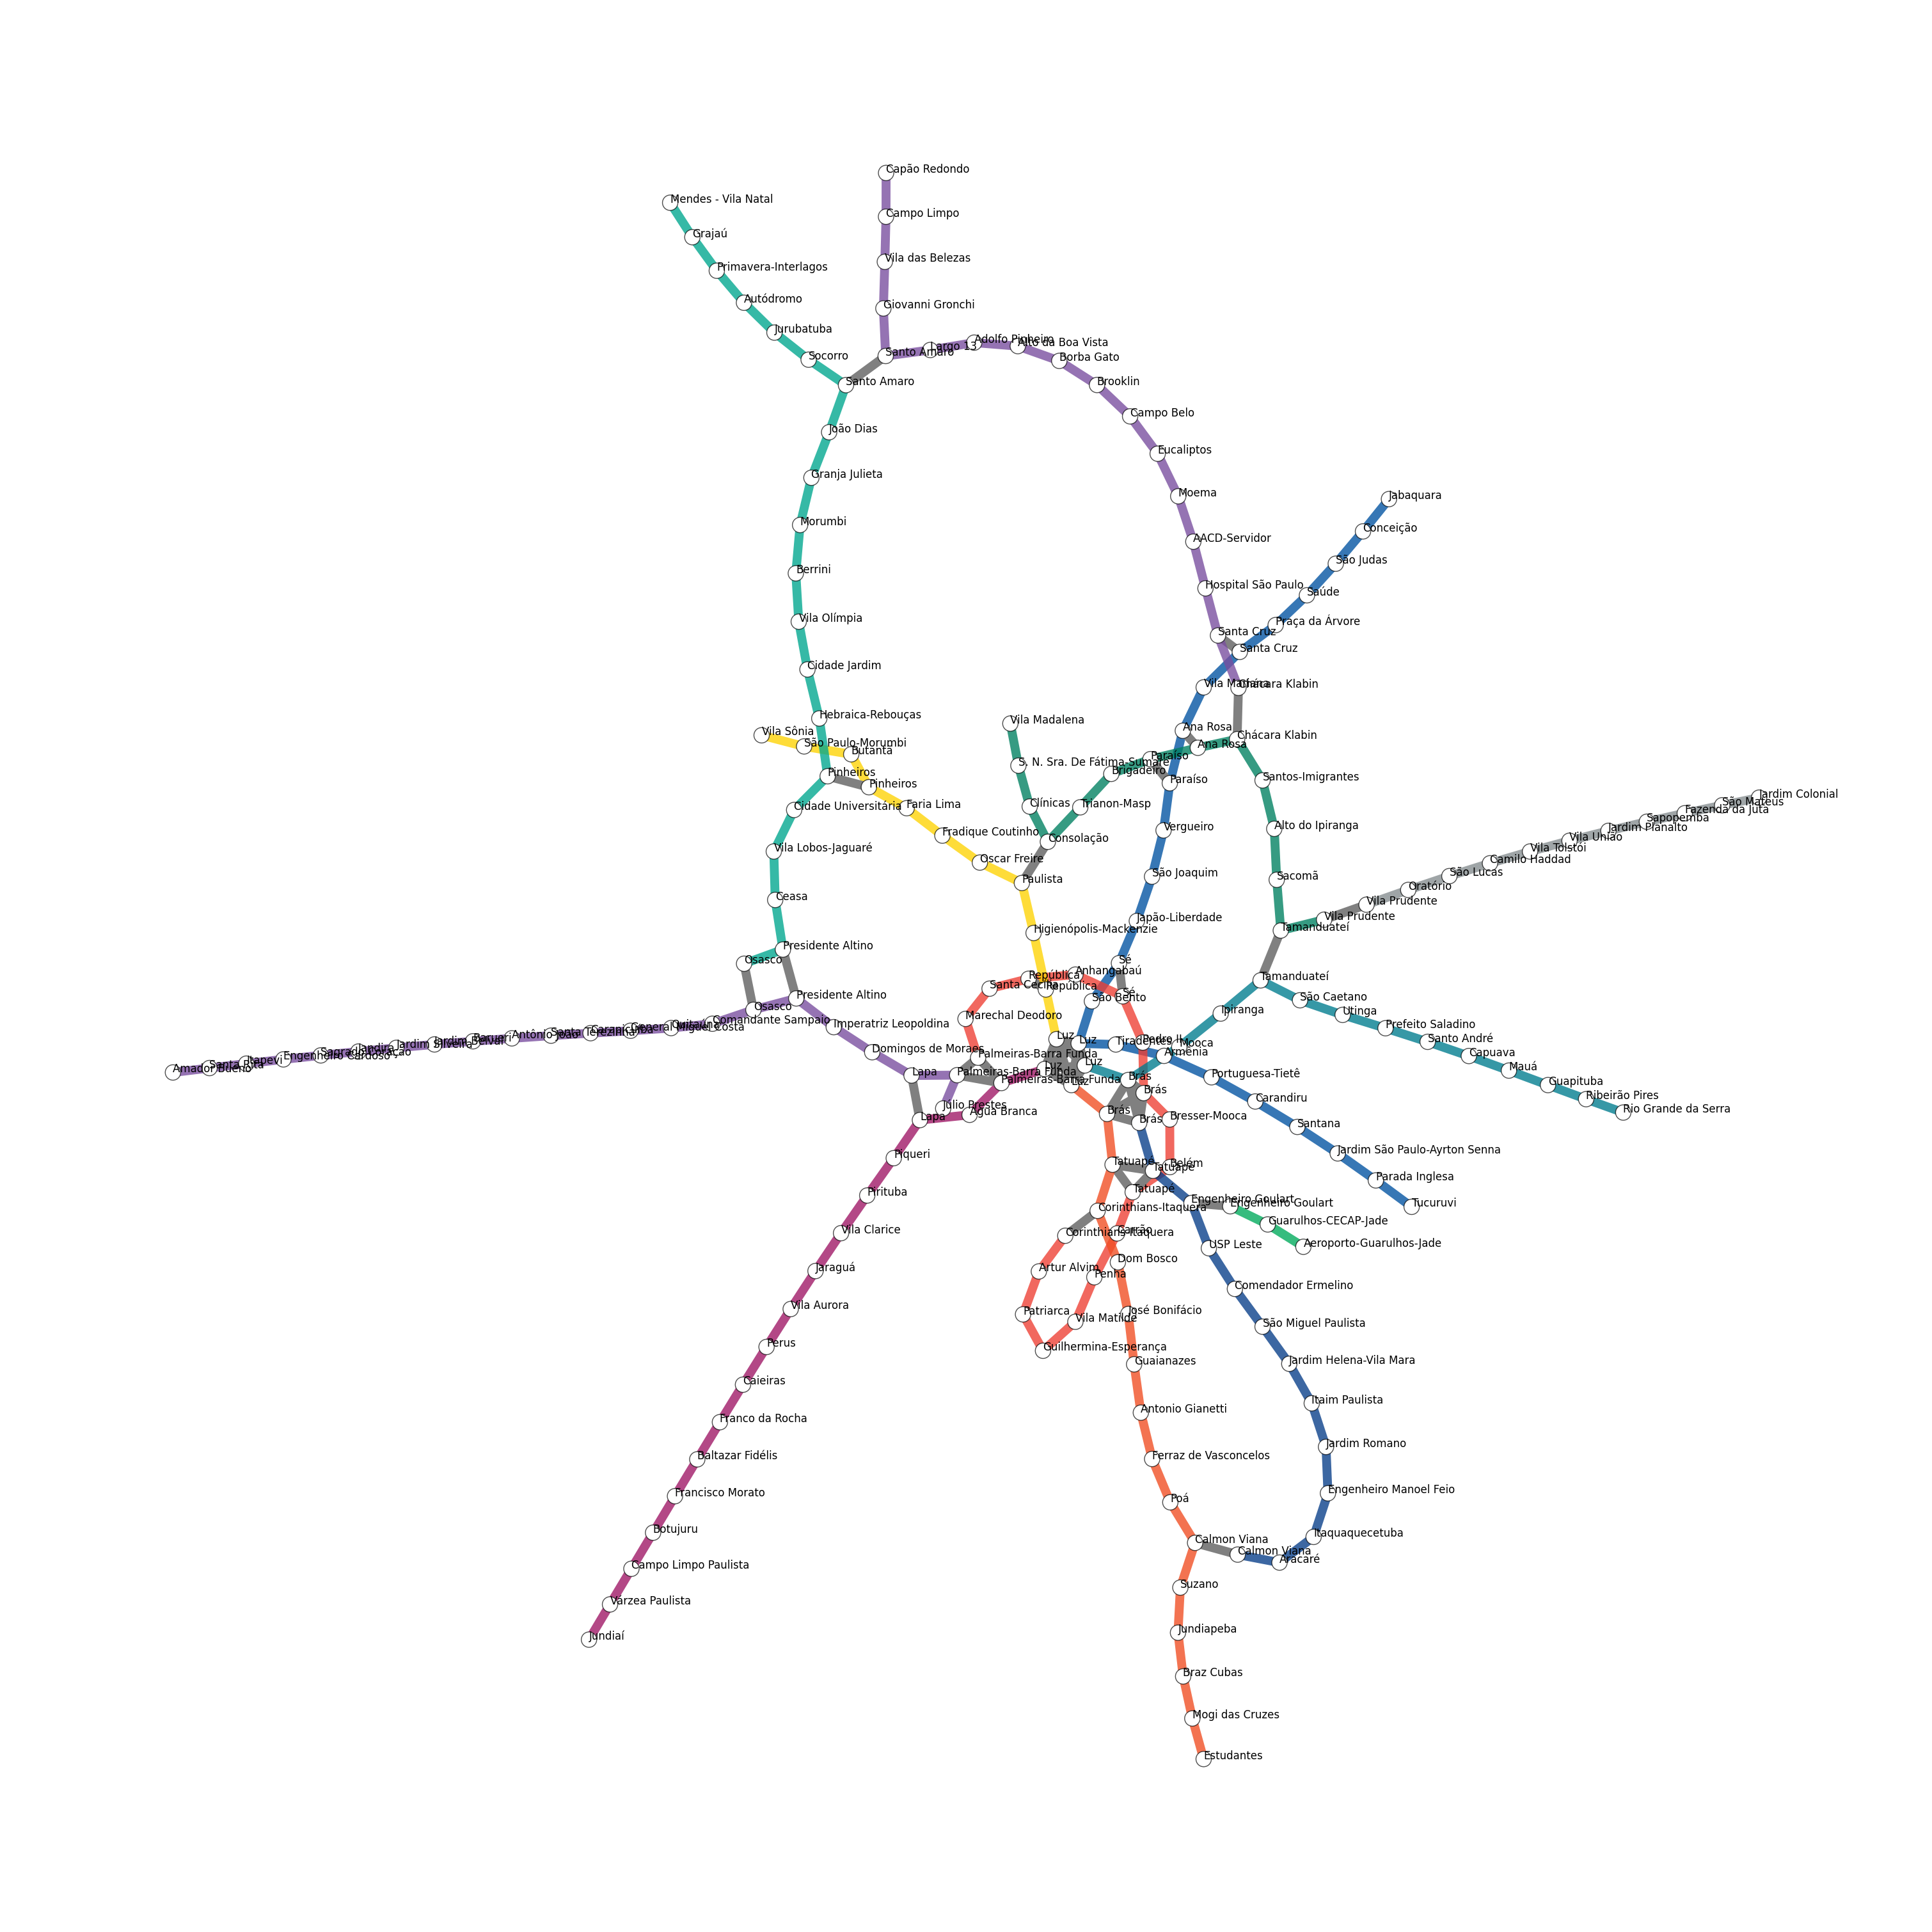

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(1,figsize=(30, 30))

cores = {
    1: "#0153A1c9",
    2: "#008061c9",
    3: "#EE3F34c9",
    4: "#FED304c9",
    5: "#794E9Fc9",
    7: "#9F1766c9",
    8: "#794E9Fc9",
    9: "#00A78Ec9",
    10: "#007C8Fc9",
    11: "#F04E22c9",
    12: "#083E89c9",
    13: "#00AB5Bc9",
    15: "#868D90c9"
}

df = pd.read_csv("sptrans.csv")
mapa = nx.Graph()

for linha in cores.keys():
    temp_df = df[df["_linhaId"] == linha]
    g = nx.Graph()
    primeiro = True
    ultimo_no = None
    for elem in temp_df.values:
        mapa.add_node(elem[0], nome=elem[1], linha=elem[3])
        if primeiro:
            primeiro = False
            ultimo_no = elem[0]
            continue
        mapa.add_edge(elem[0],ultimo_no, cor=cores[elem[2]])
        ultimo_no = elem[0]

mapa.add_edge(204,408, cor='grey')
for no1 in mapa.nodes(data='nome'):
    for no2 in mapa.nodes(data='nome'):
        if no1[1] == no2[1] and no1[0] != no2[0]:
            if (no1[0],no2[0]) not in mapa.edges and (no2[0],no1[0]) not in mapa.edges:
                mapa.add_edge(no1[0],no2[0], cor='grey')

    
def desenhar():
    x = [cor[2] for cor in mapa.edges(data='cor')]
    lab = {no:nome for no,nome in mapa.nodes(data='nome')}
    yu = nx.kamada_kawai_layout(mapa)
    nx.draw(mapa, pos=yu, labels=lab, width=10, edge_color=x, node_color='white',horizontalalignment='left',verticalalignment='baseline', edgecolors=['#000000b1' for _ in mapa.nodes])

def achar_sentido(linha,origem,proximo):
    x = df[df["_linha"] == linha]
    if origem > proximo:
        y = x["_nome"]
        return y[y.index[0]]
    y = x["_nome"]
    return y[y.index[-1]]

def procurar_caminho(no_inicial,no_final):
    caminho = nx.shortest_path(mapa,no_inicial,no_final)
    baldeou = True
    print(f"\nOrigem: {mapa.nodes[no_inicial]['nome']}\nDestino: {mapa.nodes[no_final]['nome']}\nRota:")
    for i in range(len(caminho)-1):
        if baldeou:
            print(f"- Pegue o metrô na estação {mapa.nodes[caminho[i]]['nome']} sentido {achar_sentido(mapa.nodes[caminho[i]]['linha'],caminho[i], caminho[i+1])}")
            baldeou = False
        if mapa.nodes[caminho[i]]['nome'] == mapa.nodes[caminho[i+1]]['nome']:
            print(f"- Desembarque na estação {mapa.nodes[caminho[i]]['nome']}")
            print(f"- Faça baldeação da linha {mapa.nodes[caminho[i]]['linha']} para a linha {mapa.nodes[caminho[i+1]]['linha']}, na estação {mapa.nodes[caminho[i]]['nome']}")
            baldeou = True
        
    print(f"- Desembarque na estação {mapa.nodes[no_final]['nome']}")
    print("- Você chegou a seu destino!")

def listar_estacoes(n=1):
    if n in cores.keys():
        return df[df["_linhaId"] == n]
    else:
        return False #"Selecione uma opção disponível!"

texto = """
Escolha uma opção:

1 - Listar Estações
2 - Definir Viagem
3 - Visualizar Mapa
4 - Sair

"""

def programa():
    invalido = False
    acao = False
    while True:
        clear_output()
        if acao == '3':
            desenhar()
            input()
        print(texto, "Selecione uma opção válida!" * invalido)
        invalido = False
        acao = input(">")
        if acao == '4':
            break
        elif acao == '1':
            pagina = 0
            paginas = list(cores.keys())
            while True:
                clear_output()
                print(listar_estacoes(paginas[pagina]))
                print("Navegação:\n  0-Sair\n  1-Página Anterior\n  2-Próxima Página\n")
                acao = input(">")
                if acao == '0':
                    break
                elif acao == '2':
                    if pagina < len(paginas)-1:
                        pagina += 1
                    else: 
                        pagina = 0
                elif acao == '1':
                    if pagina > 1:
                        pagina -= 1
                    else:
                        pagina = len(paginas)-1
        elif acao == '2':
            pagina = 0
            paginas = list(cores.keys())
            atual = 'Origem'
            viagem = []
            invalido = False
            while True:
                clear_output()
                if len(viagem) == 2:
                    procurar_caminho(viagem[0],viagem[1])
                    input("\n")
                    break
                print(listar_estacoes(paginas[pagina]))
                print("páginas:",paginas)
                print(f"Navegação:\n\n0-Sair\n1-Página Anterior\n2-Próxima Página\n3-Escolher {atual}\n{'Escolha uma opção válida!' * invalido}")
                invalido = False
                acao = input(">")
                if acao == '0':
                    break
                elif acao == '2':
                    if pagina < len(paginas)-1:
                        pagina += 1
                    else: 
                        pagina = 0
                elif acao == '1':
                    if pagina > 1:
                        pagina -= 1
                    else:
                        pagina = len(paginas)-1
                elif acao == '3':
                    acao = input(f"ID da estação de {atual}: ")
                    if acao.isnumeric():
                        if int(acao) in df['_estacaoId'].values:
                            viagem.append(int(acao))
                            atual = 'Destino'
                        else:
                            invalido = True
                    else:
                        invalido = True
                else:
                    invalido = True  
        elif acao == '3':
            continue
        else:
            invalido = True

programa()

Tucuruvi
23
Jabaquara
<class 'str'>
